In [1]:
import numpy as np
from matplotlib.pyplot import *
import prjlib

In [2]:
p, __ = prjlib.filename_init(stype='a0p3')
L, claa, xlaa, xvaa = np.loadtxt(p.quad.f['EB'].mcls,usecols=(0,1,4,8),unpack=True)[:,1:]
thaa = 2.*np.pi/L/(L+1.)*1e-4*0.3

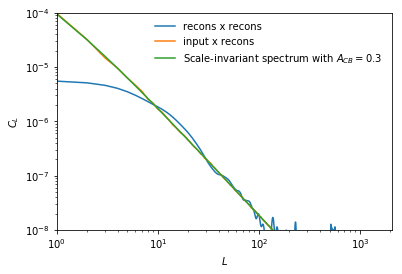

In [3]:
xlim(1,2048)
ylim(1e-8,1e-4)
xscale('log')
yscale('log')
xlabel('$L$')
ylabel(r'$C_L$')
plot(L,claa,label=r'recons x recons')
plot(L,xlaa,label=r'input x recons')
plot(L,thaa,label=r'Scale-invariant spectrum with $A_{CB}=0.3$')
legend(loc=0,frameon=False)
#savefig('fig_xinput.png')

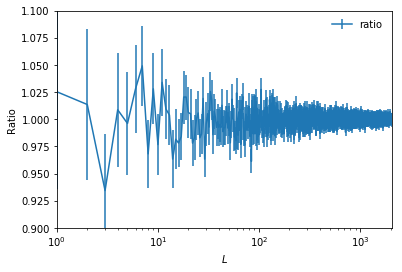

In [8]:
xlim(1,2048)
ylim(1-0.1,1+0.1)
xscale('log')
xlabel('$L$')
ylabel(r'Ratio')
errorbar(L,xlaa/thaa,yerr=xvaa/thaa/np.sqrt(100),label=r'ratio')
legend(loc=0,frameon=False)
#savefig('fig_xinput_ratio.png')

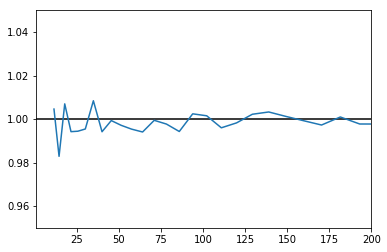

In [12]:
xlim(1,200)
ylim(.95,1.05)
axhline(1,color='k')
for A in [0.3]:
    p, __ = prjlib.filename_init(stype='a'+str(A).replace('.','p'))
    mb = prjlib.multipole_binning(100,lmin=10)
    scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,0,100,mb,cn=4)
    Fcb = np.mean(scb,axis=0)/A
    fcb = prjlib.binned_claa(2048,mb)
    plot(mb.bc,Fcb/fcb)